### Numpy array vs Python lists

In [4]:
# speed
# ist
a = [i for i in range(10000000)]
b = [i for i in range(10000000, 20000000)]

c = []

import time

start = time.time()
for i in range(len(a)):
    c.append(a[i] + b[i])

time_taken_list = time.time() - start
print("Time taken: ", time_taken_list, ' sec')

Time taken:  1.1933341026306152  sec


In [5]:
# Now the same in numpy
import numpy as np

a = np.arange(10000000)
b = np.arange(10000000, 20000000)

start = time.time()
c = a + b

time_taken_numpy = time.time() - start
print("Time taken: ", time_taken_numpy, ' sec')

Time taken:  0.0970461368560791  sec


In [6]:
print(time_taken_list / time_taken_numpy)

12.296564719524568


#### This is because numpy uses c type array, i.e. static array, and it is not a referential array
#### While list is a dynamic array. And it is a referential array

In [16]:
# memory
a = [i for i in range(10000000)]

import sys

list_size = sys.getsizeof(a)
print(list_size, ' bytes')

89095160  bytes


In [19]:
a = np.arange(10000000)

numpy_size = sys.getsizeof(a)
print(numpy_size, ' bytes')

print('\nDividing sizes list/numpy: ', list_size / numpy_size)

40000112  bytes

Dividing sizes list/numpy:  2.2273727633562626


In [20]:
a = np.arange(10000000, dtype=np.int8)

numpy_size_int8 = sys.getsizeof(a)
print(numpy_size_int8, ' bytes')

print('\nDividing sizes list/numpy: ', list_size / numpy_size_int8)

10000112  bytes

Dividing sizes list/numpy:  8.909416214538398


In [21]:
# If someone asks why numpy is better than list
# less memory
# less time to execute
# convenient

### Advanced Indexing

In [22]:
# Normal indexing and slicing 
a = np.arange(12).reshape(4, 3)
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [24]:
print(a[1:3, ::2])

[[3 5]
 [6 8]]


In [25]:
# Fancy indexing
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [27]:
print(a[::2])

[[0 1 2]
 [6 7 8]]


In [29]:
# what if we want 1, 3, 4th rows
print(a[[0, 2, 3]])

[[ 0  1  2]
 [ 6  7  8]
 [ 9 10 11]]


In [30]:
a = np.arange(24).reshape(6, 4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [32]:
# 1, 3, 4, 6 rows
print(a[[0, 2, 3, 5]])

[[ 0  1  2  3]
 [ 8  9 10 11]
 [12 13 14 15]
 [20 21 22 23]]


In [33]:
# 1, 3, 4 columns
print(a[:, [0, 2, 3]])

[[ 0  2  3]
 [ 4  6  7]
 [ 8 10 11]
 [12 14 15]
 [16 18 19]
 [20 22 23]]


In [69]:
# boolean indexing
a = np.random.randint(1, 100, 24).reshape(6, 4)
print(a)

[[85 94 42 69]
 [35 87 59 49]
 [56 57 58 27]
 [93 93  9 66]
 [73 32 79 38]
 [75 59 51 49]]


In [70]:
# find all numbers greater than 50
print(a > 50)

[[ True  True False  True]
 [False  True  True False]
 [ True  True  True False]
 [ True  True False  True]
 [ True False  True False]
 [ True  True  True False]]


In [71]:
print(a[a > 50])

[85 94 69 87 59 56 57 58 93 93 66 73 79 75 59 51]


In [73]:
# find out even numbers
print(a & 2 == 0)

[[ True False False  True]
 [False False False  True]
 [ True  True False False]
 [ True  True  True False]
 [ True  True False False]
 [False False False  True]]


In [74]:
print(a[a % 2 == 0])

[94 42 56 58 66 32 38]


In [76]:
# find all numbers greater than 50 and are even
# we use &, which is bitwise operator, because we are dealing with boolean values True and False 
# Rather than 'and', which is a logical AND 

print((a > 50) & (a % 2 == 0))

[[False  True False False]
 [False False False False]
 [ True False  True False]
 [False False False  True]
 [False False False False]
 [False False False False]]


In [77]:
print(a[(a > 50) & (a % 2 == 0)])

[94 56 58 66]


In [81]:
print(a[(a > 50) and (a % 2 == 0)])
# NOT WORKING

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [80]:
# find all numbers not divisible by 7
print(a[~(a % 7 == 0)])
print(a[a % 7 != 0])
# Both are same

[85 94 69 87 59 57 58 27 93 93  9 66 73 32 79 38 75 59 51]
[85 94 69 87 59 57 58 27 93 93  9 66 73 32 79 38 75 59 51]


### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [85]:
# same shape
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)
print(a)
print()
print(b)
print()
print(a + b)
# Item wise addition

[[0 1 2]
 [3 4 5]]

[[ 6  7  8]
 [ 9 10 11]]

[[ 6  8 10]
 [12 14 16]]


In [86]:
a = np.arange(6).reshape(2, 3)
b = np.arange(3).reshape(1, 3)

print(a)
print()
print(b)
print()
print(a + b)
# This issue of improper shape is solved by broadcasting

[[0 1 2]
 [3 4 5]]

[[0 1 2]]

[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

![Broadcasting Example](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [89]:
# More examples
a = np.arange(12).reshape(4, 3)
b = np.arange(3)

print(a)
print()
print(b)
print()
print(a + b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

[0 1 2]

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [90]:
a = np.arange(12).reshape(3, 4)
b = np.arange(3)

print(a)
print()
print(b)
print()
print(a + b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[0 1 2]



ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [91]:
a = np.arange(3).reshape(1, 3)
b = np.arange(3).reshape(3, 1)

print(a)
print()
print(b)
print()
print(a + b)

[[0 1 2]]

[[0]
 [1]
 [2]]

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [93]:
a = np.arange(3).reshape(1, 3)
b = np.arange(4).reshape(4, 1)

print(a)
print()
print(b)
print()
print(a + b)

[[0 1 2]]

[[0]
 [1]
 [2]
 [3]]

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [95]:
a = np.array([1])
# shape --> (1, 1)
b = np.arange(4).reshape(2, 2)
# shape --> (2, 2)

print(a)
print()
print(b)
print()
print(a + b)

[1]

[[0 1]
 [2 3]]

[[1 2]
 [3 4]]


In [96]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12).reshape(4, 3)

print(a)
print()
print(b)
print()
print(a + b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]



ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [97]:
a = np.arange(16).reshape(4, 4)
b = np.arange(4).reshape(2, 2)

print(a)
print()
print(b)
print()
print(a + b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[[0 1]
 [2 3]]



ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [100]:
a = np.arange(10)
print(a, '\n')
np.sum(a)

[0 1 2 3 4 5 6 7 8 9] 



45

In [101]:
print(np.sin(a))
# These are the most common ones, that is why they are available as built in

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]


In [104]:
# sigmoid from logistic regression
def sigmoid(array):
    return 1 / (1 + np.exp(-array))


a = np.arange(10)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [116]:
# mean squared error
actual = np.random.randint(1, 50, 25)
predicted = np.random.randint(1, 50, 25)

print(actual)
print(predicted)

[30 43 43 24 35  7 37 29  7 41 21 48 28 11 28 49  8 46  6 30 15 24  4 43
 44]
[46 43 27 38 26 14 29 44  3 27  3 37  6 16 42 39 24 36 32 42  7 28 12 17
 31]


In [118]:
actual - predicted

array([-16,   0,  16, -14,   9,  -7,   8, -15,   4,  14,  18,  11,  22,
        -5, -14,  10, -16,  10, -26, -12,   8,  -4,  -8,  26,  13])

In [117]:
def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)


mse(actual, predicted)

190.16

##### binary cross entropy - logistic regression


![Binary cross entropy](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-03-11-33-29.png)

In [120]:

def bin_cross_entro(actual, predicted):
    predicted = np.clip(predicted, 1e-15, 1 - 1e-15)

    return np.mean(-(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted)))


bin_cross_entro(actual, predicted)

-933.9501348328973

### Working with missing values

In [121]:
# working with missing values --> np.nan
a = np.array([1, 2, 3, 4, np.nan, 6])
print(a)

[ 1.  2.  3.  4. nan  6.]


In [123]:
## boolean indexing
np.isnan(a)

array([False, False, False, False,  True, False])

In [125]:
a[~(np.isnan(a))]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

In [132]:
# plotting a 2D plot
# x = y
# visit desmos.com

x = np.linspace(-10, 10, 100)
print(x)
y = x

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [135]:
print('x shape: ', x.shape, '\ny shape: ', y.shape)

x shape:  (100,) 
y shape:  (100,)


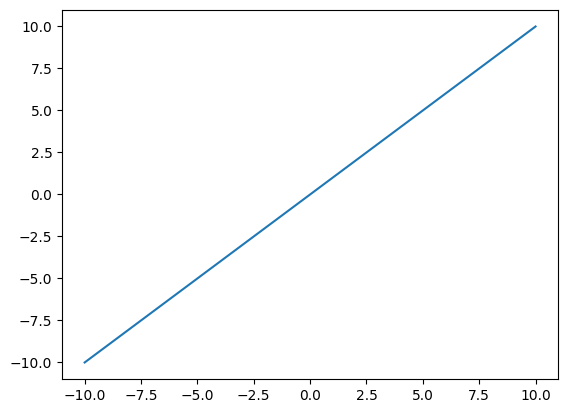

In [133]:
import matplotlib.pyplot as plt

plt.plot(x, y)

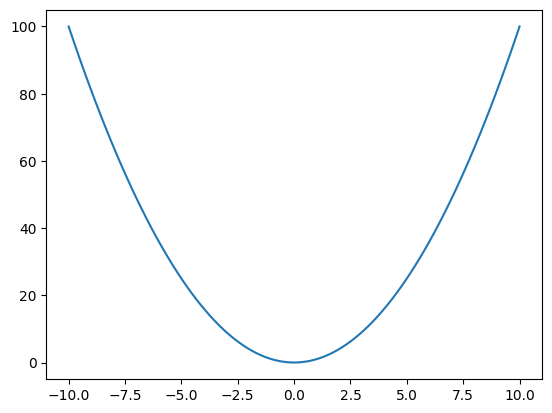

In [136]:
# y = x^2 - parabola
x = np.linspace(-10, 10, 100)
y = x ** 2

plt.plot(x, y)

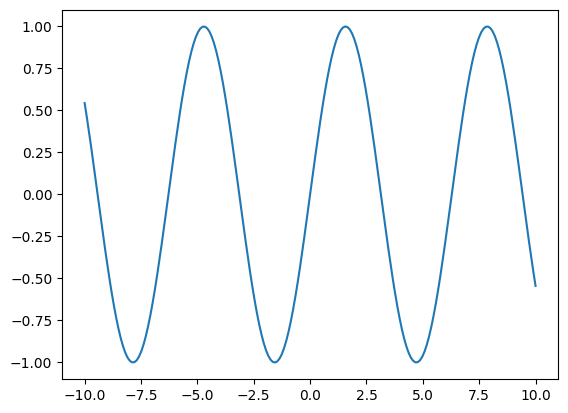

In [143]:
# y = sin(x)

x = np.linspace(-10, 10, 200)
y = np.sin(x)

plt.plot(x, y)


C:\Users\15105\AppData\Local\Temp\ipykernel_27232\139879189.py:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


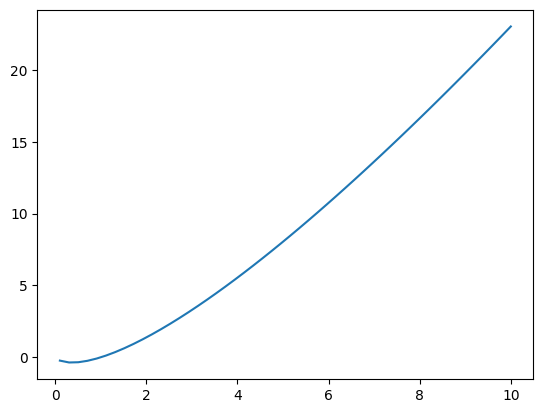

In [144]:
# y = xlog(x)
x = np.linspace(-10, 10, 100)
y = x * np.log(x)

plt.plot(x, y)

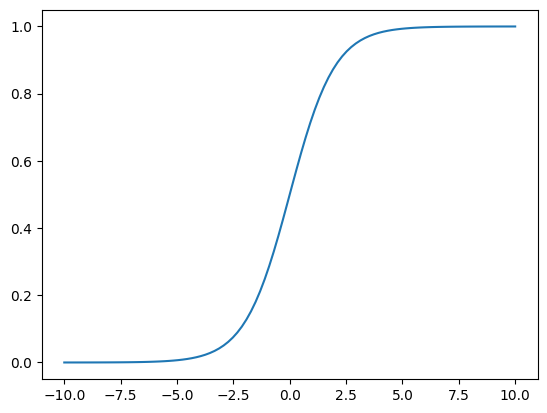

In [145]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
# or
# y = 1/(1 + np.exp(-x))

plt.plot(x, y)

In [128]:
# plotting a scatter plot

### Meshgrids

In [ ]:
# Meshgrids